In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from data.gen_data import generate_data
from psi import get_breakpoint, calculate_psi

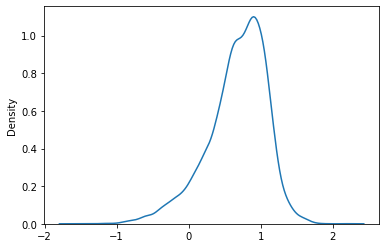

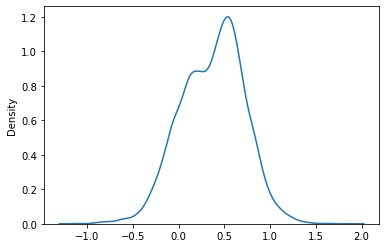

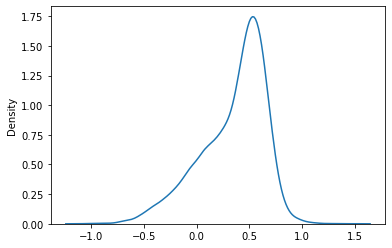

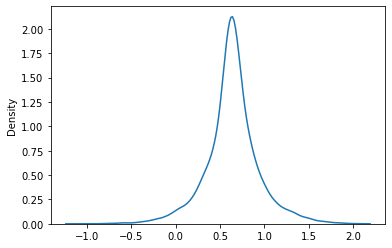

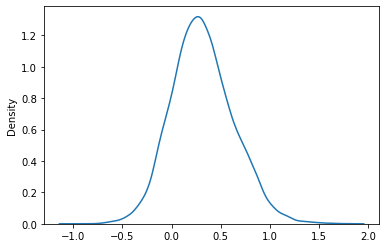

In [2]:
train, test = generate_data(num_train=500, num_test=200, true_ratio=0.9, visualize=False, num_sample=10000, bin_num=5)

In [3]:
train.shape

(500, 10001)

In [4]:
test.shape

(200, 10001)

In [ ]:
train_data = 

# Proportional discretization

In [3]:
def PKID(train_data: list) -> list:
   """Proportional k-interval discretization (PKID)
      This function employs {s*t=n, s=t} to calculate break points,
      where n is the number of training instances, 
      s is the desired interval frequency 
      and t is the desired interval number

   Args:
      train_data: 2D-array of original values

   Returns:
      breakpoints: list of breakpoints
   """

   # Calculate n, s, t
   n = len(train_data)
   t = int(n**0.5) #= s

   # Get boundary points
   breakpoints = get_breakpoint(train_data, buckettype='quantiles', buckets=t)

   return breakpoints


In [4]:
# toy example
arr = [3, 5, 2, 1, 9, 0, 2, 4, 8, 4, 9, 12, 15, -5]
print("Array's length: ", len(arr))

breakpoints = PKID(arr)
print("Break points: ", breakpoints)

Array's length:  14
Break points:  [-5.          2.33333333  7.         15.        ]


In [5]:
# Apply in syntheis data
psi_list = []
false_index = []
predict = []
label = []
data_distribution = train.drop(columns=['Label'])
breakpoints = PKID(train.to_numpy().reshape(-1))
# breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='bins', buckets=10)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

In [6]:
# Report
print(confusion_matrix(label, predict))
print(classification_report(label, predict))

[[  0 161]
 [  0  38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.19      1.00      0.32        38

    accuracy                           0.19       199
   macro avg       0.10      0.50      0.16       199
weighted avg       0.04      0.19      0.06       199



/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

# Fixed frequency discretization

In [7]:
def FFD(train_data: list, m: int) -> list:
    """Fixed frequency discretization

    Args:
        train_data: 2D-array of original values
        m: sufficient interval frequency (need to be specified arcoding to domain knowledge)

    Returns:
        breakpoints: list of breakpoints
    """

    # Get boundary points
    breakpoints = get_breakpoint(train_data, buckettype='quantiles', buckets=len(train_data) // m)

    return breakpoints

In [8]:
# toy example
arr = [3, 5, 2, 1, 9, 0, 2, 4, 8, 4, 9, 12, 15, -5]
print("Array's length: ", len(arr))

breakpoints = FFD(arr, m=4)
print("Break points: ", breakpoints)

Array's length:  14
Break points:  [-5.          2.33333333  7.         15.        ]


In [9]:
# Apply in syntheis data
psi_list = []
false_index = []
predict = []
label = []
data_distribution = train.drop(columns=['Label'])
breakpoints = FFD(train.to_numpy().reshape(-1), m=500)
# breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='quantiles', buckets=20)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

In [10]:
print(confusion_matrix(label, predict))
print(classification_report(label, predict))

[[  0 161]
 [  0  38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.19      1.00      0.32        38

    accuracy                           0.19       199
   macro avg       0.10      0.50      0.16       199
weighted avg       0.04      0.19      0.06       199



/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

# Sklearn implementation

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

## Equal width

In [37]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [38]:
est.fit(train.to_numpy().reshape(-1, 1))

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [39]:
breakpoints = est.bin_edges_
breakpoints

array([array([-2.01782722, -1.55405267, -1.09027813, -0.62650358, -0.16272903,
               0.30104552,  0.76482007,  1.22859462,  1.69236917,  2.15614372,
               2.61991827])                                                   ],
      dtype=object)

In [40]:
breakpoints = list(breakpoints[0])
breakpoints

[-2.0178272241499715,
 -1.5540526749918613,
 -1.090278125833751,
 -0.626503576675641,
 -0.16272902751753082,
 0.3010455216405794,
 0.7648200707986894,
 1.2285946199567999,
 1.6923691691149099,
 2.1561437182730203,
 2.6199182674311303]

In [18]:
transformed_data = est.transform(train.to_numpy().reshape(-1, 1))

In [19]:
transformed_data

array([[7.],
       [5.],
       [5.],
       ...,
       [5.],
       [5.],
       [4.]])

In [30]:
# Apply in syntheis data
psi_list = []
false_index = []
predict = []
label = []
# data_distribution = train.drop(columns=['Label'])
# breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='quantiles', buckets=20)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

In [31]:
print(confusion_matrix(label, predict))
print(classification_report(label, predict))

[[161   0]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       161
           1       1.00      0.55      0.71        38

    accuracy                           0.91       199
   macro avg       0.95      0.78      0.83       199
weighted avg       0.92      0.91      0.90       199



## Equal frequency

In [41]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [42]:
est.fit(train.to_numpy().reshape(-1, 1))

KBinsDiscretizer(encode='ordinal', n_bins=10)